In [1]:
# Apply ML models to the reflectance + VI data in order to classify/predict disease status


In [2]:
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import scipy

In [3]:
# Try with 2021 data first

data_2021 = pd.read_csv('../data/img_scout_dfs/2021/INC_skysat_scout_2021.csv')

In [4]:
data_2021.head()

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,Block,PM_severity,DM_severity,total_dis,geometry,centroid,PM_inc,DM_inc
0,20210707,1,0.032006,0.066432,0.040084,0.290003,1,1,2021-07-07,5.0,DM,0.0,0.0,0.05,POLYGON ((-77.0152645742787 42.878300949250196...,POINT (-77.0153084903025 42.8783140936145),0.0,0.0
1,20210707,2,0.033528,0.067879,0.043324,0.270290,1,2,2021-07-07,7.0,DM,0.0,0.0,0.10,POLYGON ((-77.01535545427274 42.87831851925121...,POINT (-77.0153965503027 42.87833067861654),0.0,0.0
2,20210707,3,0.033903,0.067897,0.042947,0.273817,1,3,2021-07-07,9.0,DM,0.0,0.0,0.10,POLYGON ((-77.01544069426711 42.87833411925217...,POINT (-77.01548247530272 42.87834674861851),0.0,0.0
3,20210707,4,0.032868,0.067358,0.042055,0.280455,1,4,2021-07-07,15.0,DM,0.0,0.0,0.60,POLYGON ((-77.01552730426143 42.87835065925314...,POINT (-77.01557007030289 42.87836309362055),0.0,0.0
4,20210707,5,0.032104,0.066636,0.038836,0.292664,1,5,2021-07-07,3.0,DM,0.0,0.0,0.10,POLYGON ((-77.01561588425558 42.87836680925413...,POINT (-77.01565649030296 42.878378758622546),0.0,0.0


In [6]:
def add_vis(df):
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    #df['sr']= df['nir']/df['red']
    #df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
    #df['dvi']= df['nir']-df['red']
    #df['nirv']= df['ndvi']*df['nir']
    #df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
    #df['tvi']=0.5*(120*(df['nir']-df['green'])-200*(df['red']-df['green']))
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    df['gri']=df['green']/df['red']
    
    return df

In [7]:
add_vis(data_2021)

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,...,total_dis,geometry,centroid,PM_inc,DM_inc,ndvi,evi,savi,arvi,gri
0,20210707,1,0.032006,0.066432,0.040084,0.290003,1,1,2021-07-07,5.0,...,0.05,POLYGON ((-77.0152645742787 42.878300949250196...,POINT (-77.0153084903025 42.8783140936145),0.0,0.0,0.757132,0.484168,0.451614,0.715161,1.657331
1,20210707,2,0.033528,0.067879,0.043324,0.270290,1,2,2021-07-07,7.0,...,0.10,POLYGON ((-77.01535545427274 42.87831851925121...,POINT (-77.0153965503027 42.87833067861654),0.0,0.0,0.723710,0.443716,0.418440,0.671497,1.566778
2,20210707,3,0.033903,0.067897,0.042947,0.273817,1,3,2021-07-07,9.0,...,0.10,POLYGON ((-77.01544069426711 42.87833411925217...,POINT (-77.01548247530272 42.87834674861851),0.0,0.0,0.728841,0.451899,0.423997,0.680854,1.580953
3,20210707,4,0.032868,0.067358,0.042055,0.280455,1,4,2021-07-07,15.0,...,0.60,POLYGON ((-77.01552730426143 42.87835065925314...,POINT (-77.01557007030289 42.87836309362055),0.0,0.0,0.739203,0.463353,0.434767,0.691031,1.601672
4,20210707,5,0.032104,0.066636,0.038836,0.292664,1,5,2021-07-07,3.0,...,0.10,POLYGON ((-77.01561588425558 42.87836680925413...,POINT (-77.01565649030296 42.878378758622546),0.0,0.0,0.765697,0.493868,0.457899,0.730553,1.715836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,20210816,303,0.017663,0.065519,0.048503,0.248441,19,15,2021-08-17,18.0,...,13.20,POLYGON ((-77.01536426393243 42.87876078918534...,POINT (-77.01540822030267 42.878773523616815),90.0,5.0,0.673318,0.355257,0.376320,0.515878,1.350815
1191,20210816,305,0.009077,0.061277,0.038242,0.256381,20,1,2021-08-17,31.0,...,0.90,POLYGON ((-77.01658187329902 42.87901510909438...,POINT (-77.01662629530372 42.8790284536449),20.0,0.0,0.740401,0.384656,0.411778,0.583637,1.602362
1192,20210816,307,0.009167,0.060350,0.038300,0.249923,20,3,2021-08-17,40.0,...,17.05,POLYGON ((-77.0164079733105 42.878982759092416...,POINT (-77.01645016030366 42.87899534864085),85.0,0.0,0.734234,0.374960,0.402722,0.575031,1.575718
1193,20210816,309,0.011672,0.062224,0.041776,0.253272,20,5,2021-08-17,14.0,...,0.05,POLYGON ((-77.01623108332213 42.87894828909042...,POINT (-77.01627422530342 42.878961353636775),0.0,0.0,0.716820,0.373304,0.399026,0.557872,1.489476


In [8]:
# Label data by disease severity

data_2021['disease_sev']='low'
data_2021.loc[data_2021['DM_severity'] > 10, 'disease_sev'] = 'high'

data_2021['disease_inc']='low'
data_2021.loc[data_2021['DM_inc'] > 25, 'disease_inc'] = 'high'

## Resample

Low disease: 1074
High disease: 121
Proportion: 8.88 : 1
Low inc: 791
High inc: 404
Proportion: 1.96 : 1


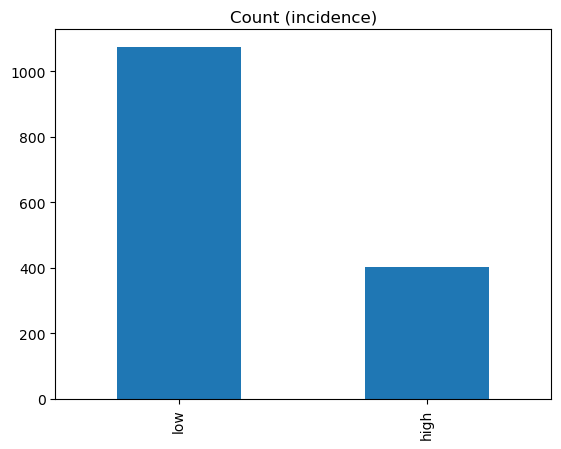

In [13]:
# Visualize data imbalance

target_count = data_2021.disease_sev.value_counts()
print('Low disease:', target_count[0])
print('High disease:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (severity)');

inc_count = data_2021.disease_inc.value_counts()
print('Low inc:', inc_count[0])
print('High inc:', inc_count[1])
print('Proportion:', round(inc_count[0] / inc_count[1], 2), ': 1')

inc_count.plot(kind='bar', title='Count (incidence)');

In [32]:
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# set features
features = ['blue','green', 'red', 'nir', 'evi', 'arvi', 'savi', 'gri']

# split into features and class labels
X = data_2021[features]
y = data_2021['disease_sev']

# 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=1)


In [19]:
from sklearn import ensemble

# maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

# trainAcc = np.zeros(len(maxdepths))
# testAcc = np.zeros(len(maxdepths))

# index = 0
# for depth in maxdepths:
#     clf = ensemble.RandomForestClassifier(max_depth=depth)
#     clf = clf.fit(X_train, y_train)
#     y_predTrain = clf.predict(X_train)
#     y_predTest = clf.predict(X_test)
#     trainAcc[index] = accuracy_score(y_train, y_predTrain)
#     testAcc[index] = accuracy_score(y_test, y_predTest)
#     index += 1

Text(0, 0.5, 'Accuracy')

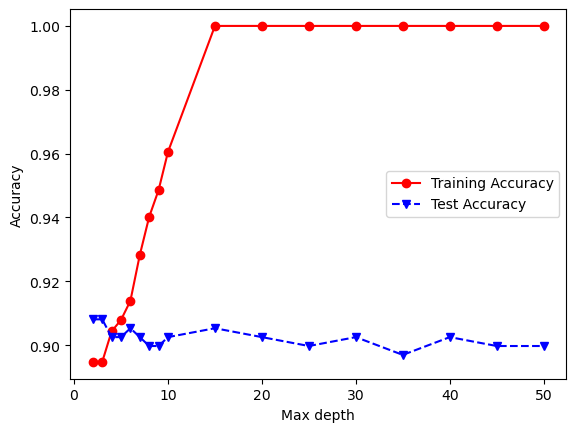

In [20]:
# plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
# plt.legend(['Training Accuracy','Test Accuracy'])
# plt.xlabel('Max depth')
# plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

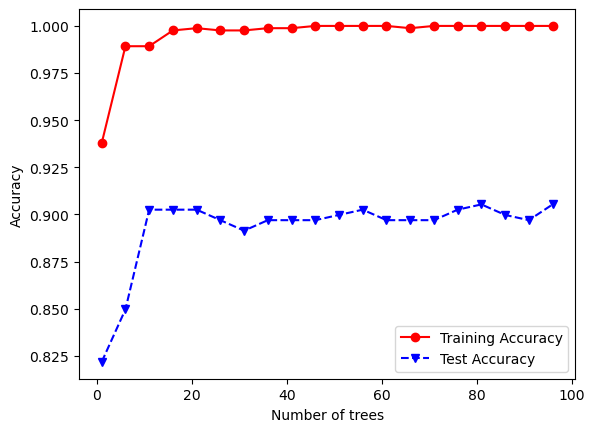

In [30]:
# maxdepth = 2
# n_trees = range(1, 101, 5)

# trainAcc = []
# testAcc = []

# for n in n_trees:
#     clf = ensemble.RandomForestClassifier(n_estimators=n)
#     clf.fit(X_train, y_train)
#     Y_predTrain = clf.predict(X_train)
#     Y_predTest = clf.predict(X_test)
#     trainAcc.append(accuracy_score(y_train, Y_predTrain))
#     testAcc.append(accuracy_score(y_test, Y_predTest))

# plt.plot(n_trees, trainAcc, 'ro-', n_trees, testAcc,'bv--')
# plt.legend(['Training Accuracy','Test Accuracy'])
# plt.xlabel('Number of trees')
# plt.ylabel('Accuracy')

In [38]:
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

accuracy = accuracy_score(y_test, Y_predTest)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.14%


In [39]:
#Y_predTest
from sklearn.metrics import confusion_matrix


conf_mat = confusion_matrix(y_true=y_test, y_pred=Y_predTest)
print('Confusion matrix:\n', conf_mat)


Confusion matrix:
 [[  4  32]
 [  7 316]]


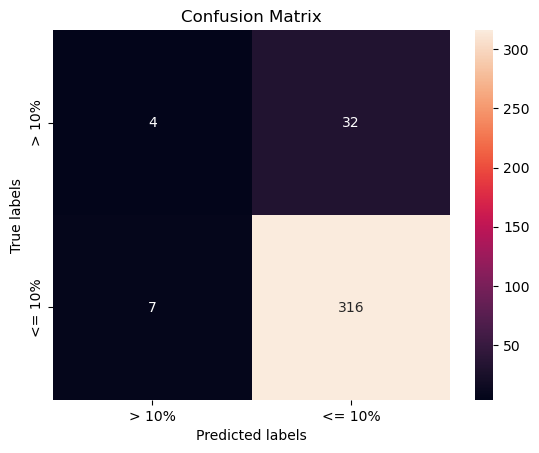

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['> 10%', '<= 10%']); ax.yaxis.set_ticklabels(['> 10%','<= 10%']);

In [41]:
# Feature importances

importances = clf.feature_importances_

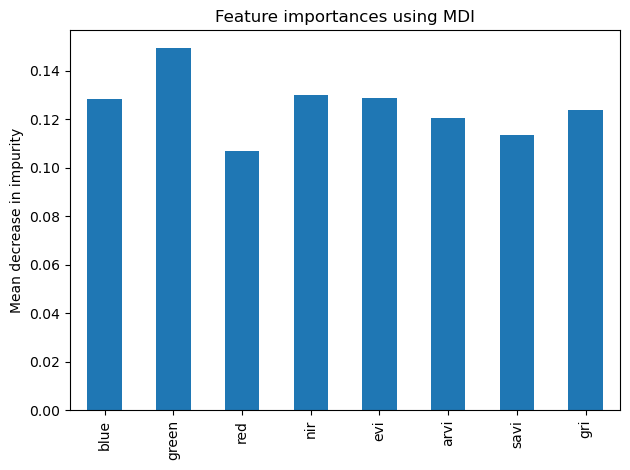

In [42]:
forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [27]:
testAcc

[0.8189415041782729,
 0.8662952646239555,
 0.8885793871866295,
 0.8969359331476323,
 0.9080779944289693,
 0.8941504178272981,
 0.8913649025069638,
 0.8913649025069638,
 0.8941504178272981,
 0.8997214484679665,
 0.8997214484679665,
 0.9025069637883009,
 0.8997214484679665,
 0.9025069637883009,
 0.9025069637883009,
 0.8997214484679665,
 0.8969359331476323,
 0.9052924791086351,
 0.9052924791086351,
 0.9025069637883009]

In [20]:
model_all = tree.DecisionTreeClassifier()
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_all)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.57%


In [21]:
#Try with just one feature
model_nir = tree.DecisionTreeClassifier()
model_nir.fit(X_train[['nir']], y_train)
y_pred_nir = model_nir.predict(X_test[['nir']])

accuracy = accuracy_score(y_test, y_pred_nir)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.34%


Confusion matrix:
 [[  5  28]
 [ 39 287]]


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_13538/2583314570.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_13538/2583314570.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


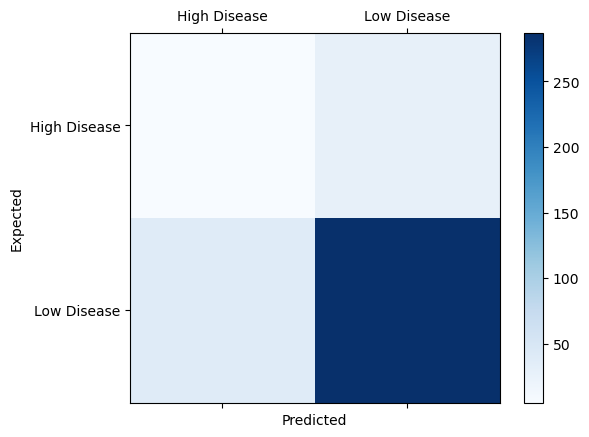

In [22]:
# Plot confusion matrix for the single-feature model (just NIR)

from sklearn.metrics import confusion_matrix


conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_nir)
print('Confusion matrix:\n', conf_mat)

labels = ['High Disease', 'Low Disease']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [23]:
# Resample to balance the dataset and see if accuracy improves
import imblearn as imb


In [24]:
# First try naive random undersampling (samples from majority class with replacement)
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)


In [25]:
X_resampled

,blue,green,red,nir,ndvi,evi,arvi,savi
0,0.039979,0.076186,0.058634,0.357662,0.718304,0.530332,0.644606,0.489516
1,0.041257,0.076057,0.054167,0.355180,0.735351,0.548992,0.682294,0.496532
2,0.041457,0.077332,0.058714,0.357157,0.717633,0.533500,0.649197,0.488785
3,0.043690,0.078921,0.062028,0.346786,0.696548,0.511685,0.623714,0.469995
4,0.041176,0.079490,0.061128,0.347045,0.700482,0.508753,0.621235,0.472241
...,...,...,...,...,...,...,...,...
237,0.016346,0.068286,0.047239,0.272886,0.704870,0.393462,0.554825,0.412705
238,0.004661,0.030714,0.025907,0.225668,0.794040,0.370984,0.654326,0.398684
239,0.011239,0.066016,0.042787,0.265568,0.722481,0.387310,0.562608,0.413396
240,0.038972,0.073183,0.054155,0.356100,0.735993,0.543560,0.674040,0.497572


In [26]:
# Check number of high dis/low dis samples in resampled set
y_resampled.value_counts()

high    121
low     121
Name: disease_sev, dtype: int64

In [27]:
# Compare to original dataset
y.value_counts()

low     1074
high     121
Name: disease_sev, dtype: int64

In [28]:
# Now, set up a pipeline to resample then model the data

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_validate
from imblearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [50]:
# Leave some data out for testing later

X, X_left_out, y, y_left_out = train_test_split(
    X, y, stratify=y, random_state=0)

In [51]:
y_left_out.value_counts()

low     269
high     30
Name: disease_sev, dtype: int64

In [62]:
model = make_pipeline(
    RandomUnderSampler(random_state=0),
    HistGradientBoostingClassifier(random_state=1)
)
cv_results = cross_validate(
    model, X, y, scoring="balanced_accuracy",
    return_train_score=True, return_estimator=True,
    n_jobs=-1
)
print(
    f"Balanced accuracy mean (undersampling) +/- std. dev.: "
    f"{cv_results['test_score'].mean():.3f} +/- "
    f"{cv_results['test_score'].std():.3f}"
)

Balanced accuracy mean (undersampling) +/- std. dev.: 0.637 +/- 0.044


In [63]:
scores = []
for fold_id, cv_model in enumerate(cv_results["estimator"]):
    scores.append(
        balanced_accuracy_score(
            y_left_out, cv_model.predict(X_left_out)
       )
    )
print(
    f"Balanced accuracy mean (undersampling) +/- std. dev.: "
    f"{np.mean(scores):.3f} +/- {np.std(scores):.3f}"
)

Balanced accuracy mean (undersampling) +/- std. dev.: 0.727 +/- 0.037


In [64]:
# Repeat with oversampling

from imblearn.over_sampling import RandomOverSampler

model_os = make_pipeline(
    RandomOverSampler(random_state=1),
    HistGradientBoostingClassifier(random_state=1)
)
cv_results_os = cross_validate(
    model_os, X, y, scoring="balanced_accuracy",
    return_train_score=True, return_estimator=True,
    n_jobs=-1
)
print(
    f"Balanced accuracy mean (oversampling) +/- std. dev.: "
    f"{cv_results_os['test_score'].mean():.3f} +/- "
    f"{cv_results_os['test_score'].std():.3f}"
)

Balanced accuracy mean (oversampling) +/- std. dev.: 0.562 +/- 0.026


In [65]:
scores_os = []
for fold_id, cv_model in enumerate(cv_results_os["estimator"]):
    scores_os.append(
        balanced_accuracy_score(
            y_left_out, cv_model.predict(X_left_out)
       )
    )
print(
    f"Balanced accuracy mean (oversampling) +/- std. dev.: "
    f"{np.mean(scores_os):.3f} +/- {np.std(scores_os):.3f}"
)

Balanced accuracy mean (oversampling) +/- std. dev.: 0.591 +/- 0.042


In [66]:
# Add shrinkage parameter to oversampler
# https://imbalanced-learn.org/stable/auto_examples/over-sampling/plot_shrinkage_effect.html#sphx-glr-auto-examples-over-sampling-plot-shrinkage-effect-py

model_shrink = make_pipeline(
    RandomOverSampler(random_state=1, shrinkage=1),
    HistGradientBoostingClassifier(random_state=42)
)
cv_results_shrink = cross_validate(
    model_shrink, X, y, scoring="balanced_accuracy",
    return_train_score=True, return_estimator=True,
    n_jobs=-1
)
print(
    f"Balanced accuracy mean (os/shrinkage) +/- std. dev.: "
    f"{cv_results_shrink['test_score'].mean():.3f} +/- "
    f"{cv_results_shrink['test_score'].std():.3f}"
)

Balanced accuracy mean (os/shrinkage) +/- std. dev.: 0.519 +/- 0.020


In [67]:
scores_shrink = []
for fold_id, cv_model in enumerate(cv_results_shrink["estimator"]):
    scores_shrink.append(
        balanced_accuracy_score(
            y_left_out, cv_model.predict(X_left_out)
       )
    )
print(
    f"Balanced accuracy mean (os/shrinkage) +/- std. dev.: "
    f"{np.mean(scores_shrink):.3f} +/- {np.std(scores_shrink):.3f}"
)

Balanced accuracy mean (os/shrinkage) +/- std. dev.: 0.591 +/- 0.032


In [ ]:
# To do: compare diff. under/oversampling and model combos
# https://imbalanced-learn.org/stable/auto_examples/applications/plot_impact_imbalanced_classes.html
